In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 12,7
data = pd.read_csv('DTP.csv').drop(['oktmo', 'road_code', 'road_name'], axis = 1)

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [3]:
data.head()

,reg_code,reg_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,latitude,longitude
0,35,Республика Крым,Региональная или межмуниципальная дорога общег...,"ЮФО, Республика Крым, Симферополь",Наезд на пешехода,20170517,20:00,Переход через проезжую часть вне пешеходного п...,2,0,2,3,44.947035,34.050493
1,96,Чеченская Республика,Региональная или межмуниципальная дорога общег...,"СКФО, Чеченская Республика, Сунженский, Сернов...",Столкновение,20170517,19:47,Эксплуатация технически неисправного ТС,1,1,2,3,43.308600,45.138900
2,46,Московская область,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Можайский район",Столкновение,20170519,11:40,Несоблюдение очередности проезда,1,0,2,3,55.519494,35.894802
3,718,Ханты-Мансийский автономный округ — Югра,Региональная или межмуниципальная дорога общег...,"УФО, Ханты-Мансийский автономный округ, Сургут...",Опрокидывание,20170519,11:15,Другие нарушения ПДД водителями,1,0,1,1,61.722500,73.643200
4,98,Республика Саха (Якутия),Региональная или межмуниципальная дорога общег...,"ДВФО, Республика Саха (Якутия), Якутск",Опрокидывание,20170519,05:56,Несоответствие скорости конкретным условиям дв...,2,0,1,2,61.933100,129.597200


Text(0.5, 1.0, '10 регионов с максимальным количеством жертв в ДТП')

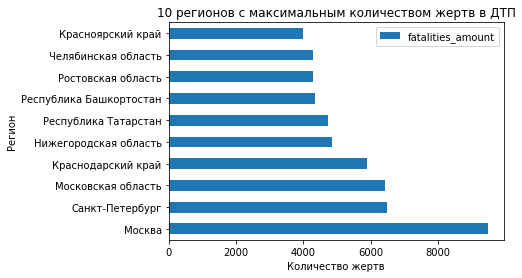

In [4]:
fatal = data.groupby('reg_name').count()[['fatalities_amount']].sort_values(
    by = 'fatalities_amount', ascending = False)

fatal.head(10).plot(kind = 'barh', y = 'fatalities_amount')
plt.xlabel('Количество жертв')
plt.ylabel('Регион')
plt.title('10 регионов с максимальным количеством жертв в ДТП')

Посмотрел на количество ДТП по России. Ожидаемо, что на первых местах оказались крупные города. Очевидная гипотеза - кол-во ДТП может быть связано с уровнем автомобилизации региона. График - самый обычный, для оценки количественных показателей

In [5]:
crash_type = data.groupby('crash_type_name')[['fatalities_amount']].count()
crash_type.head()

trace0 = go.Scatter(
    x=crash_type.index,
    y=crash_type.fatalities_amount,
    name='fatalities_amount'
)
  
data_1 = [trace0]
layout = {'title': 'Жертвы по типам ДТП'}


fig = go.Figure(data=data_1, layout=layout)

iplot(fig)
#Не понял, как подписи развернуть :(

Связь между типом ДТП и количеством жертв. Выделяются наезд на пешехода и столкновение. Гипотеза - такие ДТП могут происходить со значительным превышением скорости. В остановившихся на дорогах машинах гибнет такое же кол-во людей, как и при съезде с дороги. Выбор графика - аналогично предыдущему.

(-1.25, 1.25, -1.25, 1.25)

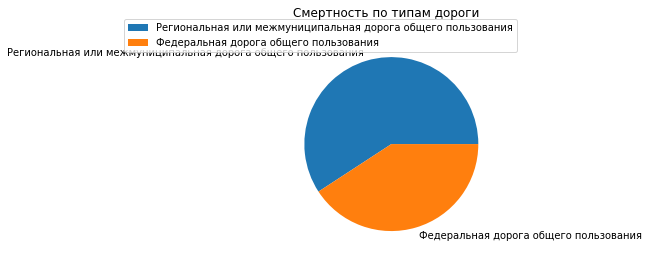

In [6]:
vehicles = data.groupby('road_type')[['reg_code']].count(
    ).sort_values(by = 'reg_code', ascending = False).drop(['Тип дороги не определен'])
vehicles.plot(kind = 'pie', subplots=True, title = 'Смертность по типам дороги')
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.axis('off')

Была гипотеза, что езда по трассе более опасна, чем в городе т.к. выше скорости, не подтвердилась. Пирог выбран для сравнения двух явно различных величин. Пришлось откинуть неизвестные типы дороги, но это тоже вряд ли трасса. При включении был бы еще больший разрыв

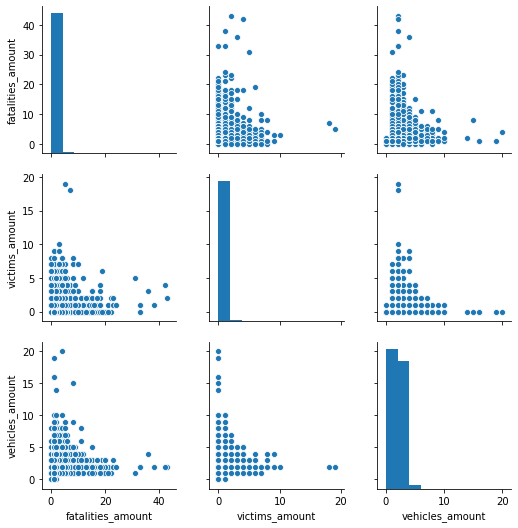

In [7]:
corr = sns.pairplot(
    data[['fatalities_amount','victims_amount','vehicles_amount']])
corr


Хотел посмотреть на корреляцию количества жертв и кол-ва транспортных средств. Много машин - оказалось безопаснее. Большинство людей гибнет в ДТП из 2-3 автомобилей. Гипотеза - лобовые столкновения на высоких скоростях.

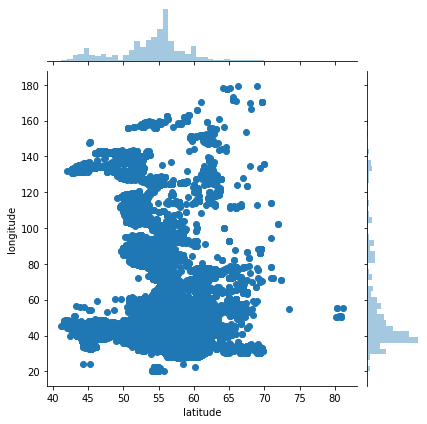

In [18]:
sns.jointplot(x='latitude', y='longitude', 
              data=data, kind='scatter')

Просто хотел что-то с координатами сделать :) На карту не сумел наложить, очень сложно пока. Ожидаемо, самое большое скопление в районе Москвы и средней полосе России. Но зато нашел выбросы - несколько ДТП произошли на 80 градусе северной широты, это какие-то небольшие острова в Баренцевом море. И на 179 градусе восточной долготы - почти что самая восточная точка России - городской округ Эгвекинот. По площади - размером с Мурманск. Но людей живет в 100 раз меньше.